<a href="https://colab.research.google.com/github/anuragsingh472002/bis-lab-code/blob/main/particle_swarn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[5,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=15,maxiter=30)

FINAL:
[0.0006531685275127548, 0.0020440174149130314]
4.604636317800932e-06


AttributeError: 'ArtistList' object has no attribute 'clear'

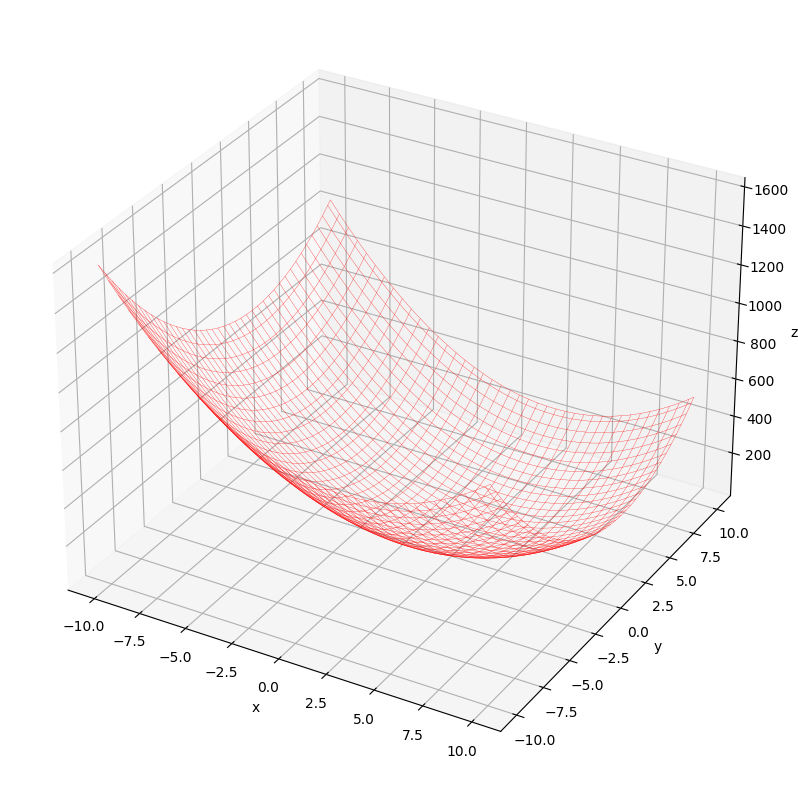

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    return f1**2 + f2**2

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    new_velocity = np.zeros_like(particle)
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)

    for i in range(len(particle)):
        new_velocity[i] = (w * velocity[i] +
                           c * r1 * (pbest[i] - particle[i]) +
                           c * r2 * (gbest[i] - particle[i]))
    return new_velocity

def update_position(particle, velocity):
    return particle + velocity

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    particles = np.array([[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)])
    pbest_position = particles.copy()
    pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]
    velocity = np.zeros((population, dimension))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    x = np.linspace(position_min, position_max, 80)
    y = np.linspace(position_min, position_max, 80)
    X, Y = np.meshgrid(x, y)
    Z = fitness_function(X, Y)
    ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

    images = []

    for t in range(generation):
        if np.average(pbest_fitness) <= fitness_criterion:
            break

        for n in range(population):
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            particles[n] = update_position(particles[n], velocity[n])

        pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

        for n in range(population):
            if pbest_fitness[n] < fitness_function(pbest_position[n][0], pbest_position[n][1]):
                pbest_position[n] = particles[n]

        gbest_index = np.argmin(pbest_fitness)
        gbest_position = pbest_position[gbest_index]

        # Collect the current positions for the animation
        ax.collections.clear()  # Clear previous scatter plot
        scatter = ax.scatter(
            particles[:, 0], particles[:, 1],
            [fitness_function(p[0], p[1]) for p in particles],
            c='b', marker='o'
        )
        images.append([scatter])

    # Create and save the animation
    animated_image = animation.ArtistAnimation(fig, images)
    animated_image.save('./pso_simple.gif', writer='pillow')

    # Print the results after the optimization
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generations: ', t + 1)  # t is zero-indexed, so add 1 for count

# Run the PSO algorithm
pso_2d(population=30, dimension=2, position_min=-10, position_max=10, generation=100, fitness_criterion=1e-3)

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    z = f1**2 + f2**2
    return z

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    # Initialize new velocity array
    num_particle = len(particle)
    new_velocity = np.array([0.0 for _ in range(num_particle)])

    # Randomly generate r1, r2 and inertia weight from uniform distribution
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)
    c1 = c
    c2 = c

    # Calculate new velocity
    for i in range(num_particle):
        new_velocity[i] = (w * velocity[i] +
                           c1 * r1 * (pbest[i] - particle[i]) +
                           c2 * r2 * (gbest[i] - particle[i]))
    return new_velocity

def update_position(particle, velocity):
    # Move particles by adding velocity
    new_particle = particle + velocity
    return new_particle

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    # Initialization
    particles = [[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)]
    pbest_position = particles.copy()
    pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]

    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]

    # Velocity (starting from 0 speed)
    velocity = np.zeros((population, dimension))

    # Loop for the number of generations
    for t in range(generation):
        # Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break

        for n in range(population):
            # Update the velocity of each particle
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            # Move the particles to new position
            particles[n] = update_position(particles[n], velocity[n])

        # Calculate the fitness value
        pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]
        # Update personal best positions
        for n in range(population):
            if pbest_fitness[n] < fitness_function(pbest_position[n][0], pbest_position[n][1]):
                pbest_position[n] = particles[n]

        # Find the index of the best particle
        gbest_index = np.argmin(pbest_fitness)
        gbest_position = pbest_position[gbest_index]

    # Print the results
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generations: ', t)

    # Plotting preparation
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    x = np.linspace(position_min, position_max, 80)
    y = np.linspace(position_min, position_max, 80)
    X, Y = np.meshgrid(x, y)
    Z = fitness_function(X, Y)
    ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

    # Animation image placeholder
    images = []

    # Add plot for each generation
    for n in range(population):
        image = ax.scatter3D(
            [particles[i][0] for i in range(population)],
            [particles[i][1] for i in range(population)],
            [fitness_function(particles[i][0], particles[i][1]) for i in range(population)],
            c='b'
        )
        images.append([image])

    # Generate the animation image and save
    animated_image = animation.ArtistAnimation(fig, images)
    animated_image.save('./pso_simple.gif', writer='pillow')

# Run the PSO algorithm
pso_2d(population=30, dimension=2, position_min=-10, position_max=10, generation=100, fitness_criterion=1e-3)

Global Best Position:  [2.59893021 2.80136768]
Best Fitness Value:  1.5074939254546923e-05
Average Particle Best Fitness Value:  0.0009441344407275629
Number of Generations:  46


IndexError: list index out of range

AttributeError: 'Path3DCollection' object has no attribute '_offset_zordered'

<Figure size 1000x1000 with 1 Axes>

Global Best Position:  [2.60023078 2.79919494]
Best Fitness Value:  3.5069167212261995e-06
Average Particle Best Fitness Value:  0.0008145427250968496
Number of Generations:  43


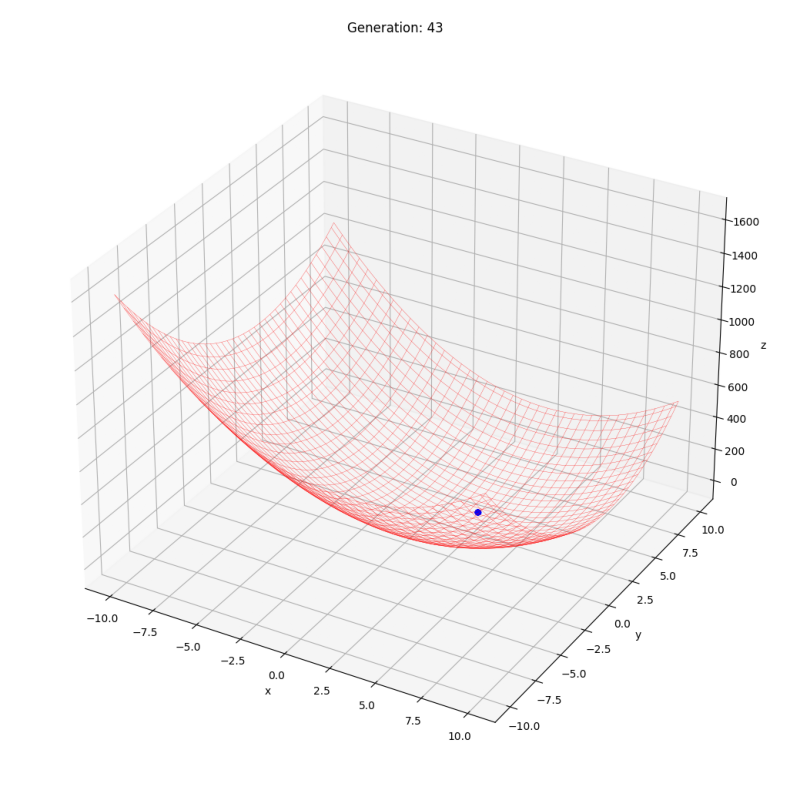

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    z = f1**2 + f2**2
    return z

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    new_velocity = np.zeros_like(particle)
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)

    for i in range(len(particle)):
        new_velocity[i] = (w * velocity[i] +
                           c * r1 * (pbest[i] - particle[i]) +
                           c * r2 * (gbest[i] - particle[i]))
    return new_velocity

def update_position(particle, velocity):
    new_particle = particle + velocity
    return new_particle

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    # Initialization
    particles = np.array([[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)])
    pbest_position = particles.copy()
    pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]

    velocity = np.zeros((population, dimension))

    images = []  # For animation

    for t in range(generation):
        if np.average(pbest_fitness) <= fitness_criterion:
            break

        for n in range(population):
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            particles[n] = update_position(particles[n], velocity[n])

        pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])
        for n in range(population):
            if pbest_fitness[n] < fitness_function(pbest_position[n][0], pbest_position[n][1]):
                pbest_position[n] = particles[n]

        gbest_index = np.argmin(pbest_fitness)
        gbest_position = pbest_position[gbest_index]

        # Plotting the current positions of the particles
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        x = np.linspace(position_min, position_max, 80)
        y = np.linspace(position_min, position_max, 80)
        X, Y = np.meshgrid(x, y)
        Z = fitness_function(X, Y)
        ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

        ax.scatter3D(
            particles[:, 0],
            particles[:, 1],
            [fitness_function(p[0], p[1]) for p in particles],
            c='b'
        )

        # Capture the frame for animation
        plt.title(f'Generation: {t + 1}')
        plt.tight_layout()
        plt.savefig(f'frame_{t}.png')
        plt.close(fig)

    # Create animation
    frames = [plt.imread(f'frame_{i}.png') for i in range(t)]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    image = ax.imshow(frames[0])

    def update(frame):
        image.set_array(frames[frame])
        return image,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=100)
    ani.save('./pso_simple.gif', writer='pillow')

    # Print the results
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generations: ', t)

# Run the PSO algorithm
pso_2d(population=30, dimension=2, position_min=-10, position_max=10, generation=100, fitness_criterion=1e-3)
